In [1]:
if "descended" not in locals():
    descended = 1
    %cd ".."
    
import utils

import os
import numpy as np
import matplotlib.pyplot as plt
import torch

from detection import rnn_detection as rnn_det
from detection import bls_detection as bls_det
from simulations import lightcurve_simulation as lcsim
import visualize as vis

from scipy.ndimage import gaussian_filter1d

from wotan import flatten

/Users/Yke/Desktop/AI/Thesis/ESA/transit-detection-rnn


In [5]:
# import sys
# del sys.modules["detection.rnn_detection"]

In [13]:
rnn = torch.load("models/bigru1_w4sqrt_sim.pt")

In [7]:
np.random.seed(42)
lc = lcsim.get_lightcurve(num_planets=2, min_transits=3, period_range=(2,100), t_max=27.4, 
                          max_attempts=4, max_snr_attempts=10, snr_range=(3,80), 
                          rdepth_range=(.5,5.), dur_range=(0,utils.hour2day(14)))
time, flux, pl_masks, params = lc
pl1, pl2 = pl_masks[0], pl_masks[1]
nontr = ~np.any(pl_masks, 0)

flux_ = (flux-1) / params["sigma"] 
flux_ = (flux_ - (-0.02693141794739591)) / 2.109453867034959
pts = rnn_det.get_pts(rnn, flux_.reshape(1,-1)).squeeze()

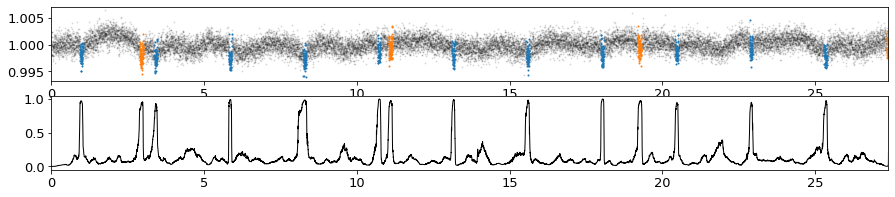

In [8]:
plt.figure(figsize=(15,3))
plt.subplot(2,1,1)
vis.plot(time[nontr], flux[nontr], c="black", a=0.1)
for msk in pl_masks:
    vis.plot(time[msk], flux[msk], c=plt.plot([])[0].get_color(), a=1)
plt.xlim(0,time[-1])

plt.subplot(2,1,2)
vis.plot(time, pts, scatter=0)
plt.xlim(0,time[-1])
plt.show()

In [6]:
rnn_det.algorithm1(pts, show_steps=0, smooth=True)

{6.390252771984485: {'period': 2.438888888888889,
  't0': 0.9569444444444445,
  'duration': 0.19444444444444375},
 6.53348664983046: {'period': 8.177777777777779,
  't0': 2.9069444444444446,
  'duration': 0.13333333333333464},
 4.229124881353901: {'period': 7.844444444444445,
  't0': 6.2347222222222225,
  'duration': 0.22222222222222232}}

In [9]:
flat = flatten(time, flux, method="median", window_length=0.5)
bls_det.algorithm(time, flat, show_steps=0)

{11.27073003119957: {'period': 2.436557988627289,
  't0': 0.9791666666666666,
  'duration': 0.08333333333333333},
 11.371724484086688: {'period': 8.16254022007391,
  't0': 2.935416666666667,
  'duration': 0.10416666666666667},
 4.402301054269617: {'period': 11.851291998869115,
  't0': 3.69375,
  'duration': 0.0625}}

In [13]:
rnn_det.algorithm2(pts, [], num_iters=5, smooth=True)

{3.14869523357972: {'period': 2.4312499999999995,
  't0': 0.9930555555555642,
  'duration': 0.1875},
 1.6505770551257692: {'period': 8.159027777777778,
  't0': 2.927777777777778,
  'duration': 0.1694444444444443},
 0.7832302273308017: {'period': 13.668055555555554,
  't0': 8.233333333333334,
  'duration': 0.27430555555555536},
 0.4214108282201774: {'period': 9.698611111111111,
  't0': 9.547222222222222,
  'duration': 0.24097222222222214},
 0.3075618541616963: {'period': 3.72962962962963,
  't0': 2.927777777777777,
  'duration': 0.22777777777777786}}

In [9]:
[params["planets"][i]["pl_period"] for i in params["planets"]]

[2.4358401237341862, 8.153331872134752]